In [1]:
from rnn import MyGRU, MyLSTM, VanillaRNN, RNN
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%load_ext autoreload
%autoreload 2

In [2]:
# Download the downsampled data frame from csv-file.
raw_data_1 = pd.read_csv(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City\2744_building_data.csv')
raw_data = pd.read_csv(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City\s-building_data.csv')

In [3]:
raw_data

,Time,Floor_network_2_temperature,Radiator_network_1_temperature,Ventilation_network_1_temperature,Outside_temperature_average,District_heat_temperature,Domestic_water_network_1_primary_valve,Domestic_water_network_1_temperature,Inside_temperature,CO2_concentration,Energy_consumption,Outside_humidity,Solar_irradiance
0,2021-11-29 09:00:00+00:00,31.4,50.2,46.2,-7.30,91.0,27.3,58.0,21.829167,490.666667,102.0,88,11.2
1,2021-11-29 10:00:00+00:00,30.4,50.8,45.5,-6.70,90.1,28.3,57.9,21.829167,492.291667,104.0,88,7.3
2,2021-11-29 10:00:00+00:00,30.4,50.8,45.5,-6.70,90.1,28.3,57.9,21.829167,492.291667,112.0,88,7.3
3,2021-11-29 11:00:00+00:00,31.0,50.7,46.7,-7.00,90.4,28.1,58.0,21.891667,514.583333,102.0,89,164.4
4,2021-11-29 11:00:00+00:00,31.0,50.7,46.7,-7.00,90.4,28.1,58.0,21.891667,514.583333,101.0,89,164.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,2022-02-14 00:00:00+00:00,27.9,37.0,37.3,1.84,79.5,27.4,58.0,21.262500,442.250000,61.0,94,1.3
2745,2022-02-14 01:00:00+00:00,27.5,37.5,37.4,1.96,79.6,28.2,58.0,21.279167,447.083333,57.0,95,1.3
2746,2022-02-14 02:00:00+00:00,28.0,36.4,37.2,2.14,79.4,29.6,58.0,21.262500,441.416667,61.0,96,0.9
2747,2022-02-14 03:00:00+00:00,27.5,36.7,37.5,2.09,79.1,29.9,58.0,21.254167,440.075000,59.0,96,1.3


In [4]:
raw_data_1

,timestamp,District_heat_temperature,Domestic_water_network_1_temperature,Ventilation_network_1_temperature,Ventilation_network_1_primary_valve,Ventilation_network_1_secondary_valve,Radiator_network_1_temperature,Radiator_network_1_primary_valve,Radiator_network_1_secondary_valve,Radiator_network_2_temperature,Radiator_network_2_primary_valve,Radiator_network_2_secondary_valve,Energy_consumption,Outside_temperature_average,Inside_temperature,CO2_concentration,avg_humidity,Outside_humidity,Solar_irradiance
0,2021-01-01 00:00:00+00:00,77.062127,0.000000,49.811631,81.451056,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.051,0.2,20.951667,NaN,25.228333,100.0,-0.9
1,2021-01-01 01:00:00+00:00,78.206575,0.000000,49.792210,79.596998,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.052,0.3,20.943333,NaN,25.333333,100.0,-1.0
2,2021-01-01 02:00:00+00:00,78.934338,0.000000,50.040496,80.145618,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.051,0.1,20.925000,NaN,24.798333,100.0,-1.1
3,2021-01-01 03:00:00+00:00,78.848334,0.000000,50.331067,80.622730,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.052,0.1,20.908333,NaN,24.335000,100.0,-1.0
4,2021-01-01 04:00:00+00:00,78.360199,0.000000,50.609373,82.395855,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.054,-0.2,20.900000,NaN,24.170000,100.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10157,2022-03-16 17:00:00+00:00,85.385960,59.509290,48.403462,1.439791,0.0,44.385069,54.734544,0.0,44.999542,100.0,0.0,0.026,6.7,21.992941,422.945714,31.833333,65.0,-3.0
10158,2022-03-16 18:00:00+00:00,86.107631,60.216362,48.430221,2.099451,0.0,44.551389,58.254373,0.0,45.185982,100.0,0.0,0.023,1.0,22.001176,420.144286,31.833333,76.0,-3.0
10159,2022-03-16 19:00:00+00:00,86.605714,60.485833,50.182364,1.639173,0.0,45.353657,59.794692,0.0,46.006131,100.0,0.0,0.025,-1.6,22.012941,423.157143,31.833333,81.0,-2.9
10160,2022-03-16 20:00:00+00:00,87.302873,60.926646,50.576908,0.960333,0.0,46.560060,60.949997,0.0,47.214870,100.0,0.0,0.025,-2.8,NaN,NaN,0.000000,85.0,-3.0


In [5]:
# RUN IF COMPARING S-BUILDING AND TAMPERE

# Apply extra preprocessing to the Tampere building(s)
raw_data_1.rename(columns={'timestamp': 'Time',
                        }, inplace=True)
raw_data_1["Energy_consumption"] = raw_data_1["Energy_consumption"] * 1000
raw_data_1 = raw_data_1.drop("CO2_concentration", axis = 1)
raw_data_1 = raw_data_1.iloc[:-2]

# Drop NAs from the certain columns
todrop = raw_data_1[raw_data_1['Outside_humidity'].isna()].index.values
raw_data_1 = raw_data_1.drop(todrop, axis = 0)
todrop = raw_data_1[raw_data_1['Solar_irradiance'].isna()].index.values
raw_data_1 = raw_data_1.drop(todrop, axis = 0)

# Select the latest part of the data to speed up the training and roughly match the training periods. 
#NB! Worth changing it for inference in summer time.

#raw_data_1 = raw_data_1.iloc[7595:]

# Trim both datasets to the highest possible amount of common features
# raw_data.columns.values # To view the columns in a dataset

raw_data_1 = raw_data_1[["Time", "District_heat_temperature", "Domestic_water_network_1_temperature", "Energy_consumption", 
                         "Radiator_network_1_temperature", "Ventilation_network_1_temperature",
                         "Outside_temperature_average", "Outside_humidity", "Solar_irradiance"]]
raw_data = raw_data[["Time", "District_heat_temperature", "Domestic_water_network_1_temperature", "Energy_consumption", 
                         "Radiator_network_1_temperature", "Ventilation_network_1_temperature",
                         "Outside_temperature_average", "Outside_humidity", "Solar_irradiance"]]

hvac_model_1 = MyGRU(quant=['Energy_consumption'], seq=12, fut=0, parameters=['District_heat_temperature',
       'Domestic_water_network_1_temperature', 'Energy_consumption',
       'Radiator_network_1_temperature',
       'Ventilation_network_1_temperature', 'Outside_temperature_average',
       'Outside_humidity', 'Solar_irradiance'])

x_train_1, y_train_1, x_test_1, y_test_1 = hvac_model_1.preprocess(raw_data_1, 0.002)

Shape of training data: (10106, 12, 8)
Shape of testing data: (8, 12, 8)


In [6]:
# Initialize the model with the required parameters. Change the parameters if applying another dataset.
hvac_model = MyGRU(quant=['Energy_consumption'], seq=12, fut=0, parameters=['District_heat_temperature',
       'Domestic_water_network_1_temperature', 'Energy_consumption',
       'Radiator_network_1_temperature',
       'Ventilation_network_1_temperature', 'Outside_temperature_average',
       'Outside_humidity', 'Solar_irradiance'])
              
# Scale, split, and sequence the downsampled data frame.
x_train, y_train, x_test, y_test = hvac_model.preprocess(raw_data, 0.01)

C:\Users\romat\miniconda3\envs\city\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\romat\Documents\GitHub\HAMK_Smart_City\rnn.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['weekday'] = [t.timetuple().tm_wday for t in datetimes]
C:\Users\romat\Documents\GitHub\HAMK_Smart_City\rnn.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

Shape of training data: (2710, 12, 8)
Shape of testing data: (15, 12, 8)


In [7]:
# Train the model using custom fit method. 
# Does hyperparameter optimization automatically in pre-defined search space. Comment row below, if you have already trained the model.
hvac_model.fit(X=x_train_1, y=y_train_1, epochs=1000, max_trials=15)
hvac_model.save()

Trial 15 Complete [00h 08m 45s]
val_loss: 0.012156543375749607

Best val_loss So Far: 0.010702840794692747
Total elapsed time: 01h 39m 44s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in C:\Users\romat\Documents\GitHub\HAMK_Smart_City\GRU_Energy_consumption_2022-03-29
Showing 15 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 100
layers: 2
activation function: tanh
learning rate: 0.001
Score: 0.010702840794692747
Trial summary
Hyperparameters:
units: 70
layers: 2
activation function: tanh
learning rate: 0.001
Score: 0.0111167065508198
Trial summary
Hyperparameters:
units: 100
layers: 2
activation function: tanh
learning rate: 0.01
Score: 0.011774551327107474
Trial summary
Hyperparameters:
units: 30
layers: 1
activation function: tanh
learning rate: 0.1
Score: 0.011941687023499981
Trial summary
Hyperparameters:
units: 40
layers: 1
activation function: tanh
learning rate: 0.01
Score: 0.012013294256757946
Trial summary
Hyperpa

In [7]:
# Uncomment below to load the existing model, scaler and other variables, if you have the model trained already.
hvac_model.load(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City\GRU_Energy_consumption_2022-03-29_S-building')

Model loaded.
Scaler loaded.
Other variables loaded.


In [19]:
# Calculating prediction intervals using bootstrap
rounds = 12     # Number of data instances to calculate prediction intervals to.

for i in range(rounds):
    
    # Calculating prediction percentiles and saving them to a csv file.
    hvac_model.prediction_interval(x_train, y_train, x_test[i])     # NB! The process is computationally intensive.

Savings prediction intervals to C:\Users\romat\Documents\GitHub\HAMK_Smart_City/GRU_Inside_temperature_2022-03-15.
Starting bootstrap 1/46
Starting bootstrap 2/46
Starting bootstrap 3/46
Starting bootstrap 4/46
Starting bootstrap 5/46
Starting bootstrap 6/46
Starting bootstrap 7/46
Starting bootstrap 8/46
Starting bootstrap 9/46
Starting bootstrap 10/46
Starting bootstrap 11/46
Starting bootstrap 12/46
Starting bootstrap 13/46
Starting bootstrap 14/46
Starting bootstrap 15/46
Starting bootstrap 16/46
Starting bootstrap 17/46
Starting bootstrap 18/46
Starting bootstrap 19/46
Starting bootstrap 20/46
Starting bootstrap 21/46
Starting bootstrap 22/46
Starting bootstrap 23/46
Starting bootstrap 24/46
Starting bootstrap 25/46
Starting bootstrap 26/46
Starting bootstrap 27/46
Starting bootstrap 28/46
Starting bootstrap 29/46
Starting bootstrap 30/46
Starting bootstrap 31/46
Starting bootstrap 32/46
Starting bootstrap 33/46
Starting bootstrap 34/46
Starting bootstrap 35/46
Starting bootstrap 

Starting bootstrap 35/46
Starting bootstrap 36/46
Starting bootstrap 37/46
Starting bootstrap 38/46
Starting bootstrap 39/46
Starting bootstrap 40/46
Starting bootstrap 41/46
Starting bootstrap 42/46
Starting bootstrap 43/46
Starting bootstrap 44/46
Starting bootstrap 45/46
Starting bootstrap 46/46
Saving results to C:\Users\romat\Documents\GitHub\HAMK_Smart_City/GRU_Inside_temperature_2022-03-15.
----------------------------------------------------------------------------------------------
Savings prediction intervals to C:\Users\romat\Documents\GitHub\HAMK_Smart_City/GRU_Inside_temperature_2022-03-15.
Starting bootstrap 1/46
Starting bootstrap 2/46
Starting bootstrap 3/46
Starting bootstrap 4/46
Starting bootstrap 5/46
Starting bootstrap 6/46
Starting bootstrap 7/46
Starting bootstrap 8/46
Starting bootstrap 9/46
Starting bootstrap 10/46
Starting bootstrap 11/46
Starting bootstrap 12/46
Starting bootstrap 13/46
Starting bootstrap 14/46
Starting bootstrap 15/46
Starting bootstrap 16/4

Starting bootstrap 15/46
Starting bootstrap 16/46
Starting bootstrap 17/46
Starting bootstrap 18/46
Starting bootstrap 19/46
Starting bootstrap 20/46
Starting bootstrap 21/46
Starting bootstrap 22/46
Starting bootstrap 23/46
Starting bootstrap 24/46
Starting bootstrap 25/46
Starting bootstrap 26/46
Starting bootstrap 27/46
Starting bootstrap 28/46
Starting bootstrap 29/46
Starting bootstrap 30/46
Starting bootstrap 31/46
Starting bootstrap 32/46
Starting bootstrap 33/46
Starting bootstrap 34/46
Starting bootstrap 35/46
Starting bootstrap 36/46
Starting bootstrap 37/46
Starting bootstrap 38/46
Starting bootstrap 39/46
Starting bootstrap 40/46
Starting bootstrap 41/46
Starting bootstrap 42/46
Starting bootstrap 43/46
Starting bootstrap 44/46
Starting bootstrap 45/46
Starting bootstrap 46/46
Saving results to C:\Users\romat\Documents\GitHub\HAMK_Smart_City/GRU_Inside_temperature_2022-03-15.
----------------------------------------------------------------------------------------------


In [6]:
# Load the existing intervals if they have been predicted
low, up = hvac_model.load_intervals(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City/GRU_Inside_temperature_2022-03-15/pred_ints.csv')

In [31]:
# Use the existing confidence interval multipliers (assuming Gaussian distribution) for the prediction of the intervals
probability_multipliers = {"50": 0.67, "55": 0.76, "60": 0.84, "65": 0.93, "70": 1.04, "75": 1.15, "80": 1.28,
                           "85": 1.44, "90": 1.64, "95": 1.96, "96": 2.05, "97": 2.17, "98": 2.33, "99": 2.58}

def predict_intervals(probability, measurements, predictions):
    '''
    Function for prediction of the confidence intervals using the residual standard deviation method.
    Inputs: desired confidence interval value as string, array of the predictions, array of the measurements
    Outputs: array of lower-bound confidence, array of upper-bound confidence
    '''
    assert probability in probability_multipliers, "Please select the probability from the dictionary"
    low = []
    up = []
    sq_residuals = []
    for prediction, measurement in zip(measurements, predictions):
        sq_residuals.append(((measurement - prediction)**2)[0])
    sq_residuals = np.array(sq_residuals)
    res_stdev = np.sqrt(np.sum(sq_residuals) / (len(sq_residuals) - 2))
    multiplier = probability_multipliers[probability]
    for measurement in measurements:
        low.append((measurement - multiplier * res_stdev)[0])
        up.append((measurement + multiplier * res_stdev)[0])
    low = np.array(low)
    up = np.array(up)
    low = low.flatten()
    up = up.flatten()
    return low, up

In [32]:
# Making test predictions with the RNN model.
# Predictions for the original data
train_preds = hvac_model.model.predict(x_train)
test_preds = hvac_model.model.predict(x_test)

# Predictions for the data without the offsets
train_preds_1 = hvac_model.model.predict(x_train_1)
test_preds_1 = hvac_model.model.predict(x_test_1)

# Loading prediction intervals from disk.
#low, up = hvac_model.load_intervals(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City\GRU_Inside_temperature_2022-01-10\pred_ints.csv')

# Invert target variables both for measured values and computed predictions.
inv_preds_train, inv_y_train = hvac_model.inv_target(x_train, train_preds, y_train)
inv_preds_test, inv_y_test = hvac_model.inv_target(x_test, test_preds, y_test)

# Same for the data from the other dataset 
inv_preds_train_1, inv_y_train_1 = hvac_model.inv_target(x_train_1, train_preds, y_train_1)

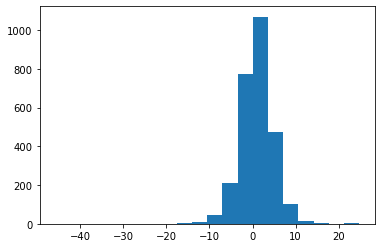

In [33]:
# Assess the distribution of the residuals
plt.hist(inv_preds_train - inv_y_train, bins = 20)
plt.show()

# Predict the intervals
#low, up = hvac_model.inv_target(x_test, low, up)
low, up = predict_intervals("85", inv_y_train_1, inv_preds_train_1)

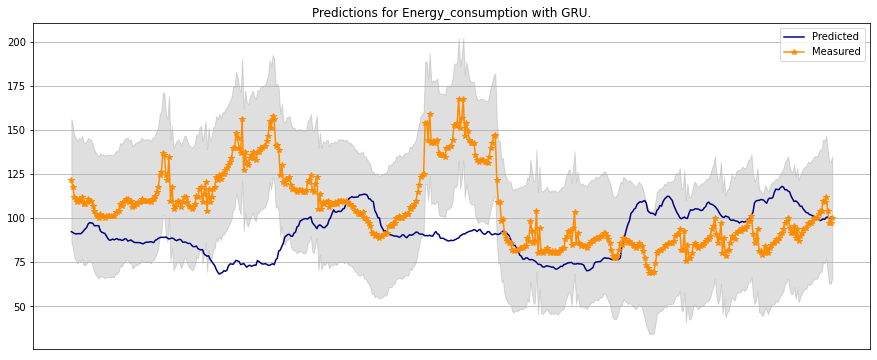

In [39]:
# Plot model prediction alongside measured values.
hvac_model.plot_preds(inv_preds_train_1[1000:1500], inv_y_train_1[1000:1500], low[1000:1500], up[1000:1500])

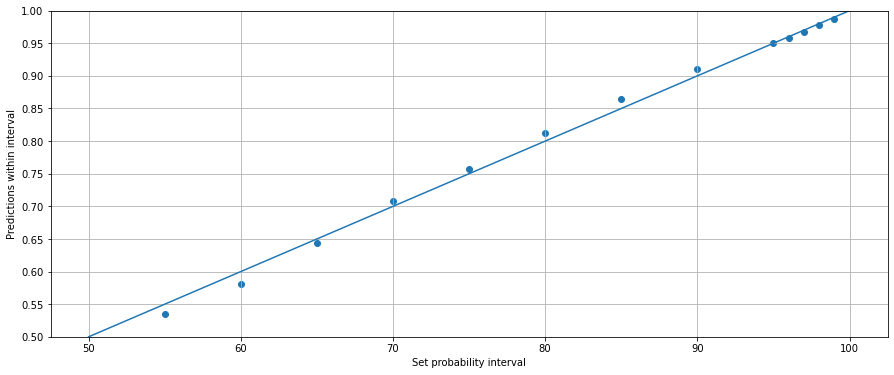

In [37]:
# Calculate percentages falling in the prediction interval to retroactively assess the residual standard deviation method
percentages = []
for probability in probability_multipliers:
    lows, ups = predict_intervals(probability, inv_y_train_1, inv_preds_train_1)
    num = 0
    denum = len(lows)
    for i, j, k in zip(lows, inv_preds_train, ups):
        if i < j < k:
            num += 1
    percentages.append(num / denum)
plt.figure(figsize = (15, 6))
plt.scatter([50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 96, 97, 98, 99], percentages)
plt.plot([50, 100], [0.5, 1])
plt.yticks(np.arange(0.0, 1.1, 0.05))
plt.ylim(bottom = 0.5, top = 1)
plt.grid(axis = "both")
plt.xlabel("Set probability interval")
plt.ylabel("Predictions within interval")
plt.show()

In [40]:
print("Train MSE: " + str(mean_squared_error(inv_preds_train, inv_y_train)))
print("Test MSE: " + str(mean_squared_error(inv_preds_test, inv_y_test)))
print("Train MAE: " + str(mean_absolute_error(inv_preds_train, inv_y_train)))
print("Test MAE: " + str(mean_absolute_error(inv_preds_test, inv_y_test)))
print("Train MAPE: " + str(mean_absolute_percentage_error(inv_preds_train, inv_y_train)))
print("Test MAPE: " + str(mean_absolute_percentage_error(inv_preds_test, inv_y_test)))

Train MSE: 16.56875663681553
Test MSE: 13.925312187539294
Train MAE: 3.037254457854807
Test MAE: 3.0490603268146517
Train MAPE: 0.03275903818497636
Test MAPE: 0.02876174712815232


In [41]:
print("Train MSE: " + str(mean_squared_error(inv_preds_train_1, inv_y_train_1)))
print("Train MAE: " + str(mean_absolute_error(inv_preds_train_1, inv_y_train_1)))
print("Train MAPE: " + str(mean_absolute_percentage_error(inv_preds_train_1, inv_y_train_1)))

Train MSE: 578.1313834791628
Train MAE: 19.378446228277202
Train MAPE: 0.2217393105019703
